In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline
sns.set(style='white', color_codes = True)
from matplotlib import rc

In [2]:
initial = pd.read_csv('C:/users/rusty/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [3]:
ps = initial[['Date', 'cell type', 'Slice (Lims ID?)', 'Post patch?', 'Post patch pipette R' , 'PCR cycles', 'SM_QC_PF', 'Bad dates']]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['Bad dates'] = ps['Bad dates'].astype('category')
ps['PCR cycles'] = ps['PCR cycles'].astype('category')
ps['cell type'] = ps['cell type'].astype('category')
ps['Post patch?'] = ps['Post patch?'].astype('category')
ps = ps[ps['PCR cycles'] == 21]
ps = ps[ps['Bad dates'] != 'x']
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps = ps[ps['cell type'] == 'tdt+']
ps.dropna(subset = ['Post patch?', 'SM_QC_PF'], inplace = True)
ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Date,cell type,Slice (Lims ID?),Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,Bad dates
5016,2017-04-21,tdt+,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN,21.0,pass,NaN
5017,2017-04-21,tdt+,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN,21.0,pass,NaN
5018,2017-04-21,tdt+,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN,21.0,fail,NaN
5019,2017-04-21,tdt+,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN,21.0,pass,NaN
5020,2017-04-21,tdt+,Gad2-IRES-Cre;Ai14-313294.04.01,No-Seal,NaN,21.0,pass,NaN


In [4]:
ps = ps.drop('Bad dates', 1)
ps = ps.drop('Date',1)
ps = ps.drop('SM_QC_PF', 1)
ps = ps.drop('PCR cycles', 1)
ps = ps.drop('cell type', 1)
ps.head()

,Slice (Lims ID?),Post patch?,Post patch pipette R
5016,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN
5017,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN
5018,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN
5019,Gad2-IRES-Cre;Ai14-313294.03.01,No-Seal,NaN
5020,Gad2-IRES-Cre;Ai14-313294.04.01,No-Seal,NaN


In [5]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [6]:
nuc = nucleated(ps)
nuc["post patch class"] = "a.Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "b.Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "c.Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "d.No seal"
entirecell = entire_cell(ps)
entirecell['post patch class'] = "e.Entire cell"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [7]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps = pd.concat(frames)
ps.head()

,Slice (Lims ID?),Post patch?,Post patch pipette R,post patch class
5022,Gad2-IRES-Cre;Ai14-313294.04.01,Nucleated,NaN,a.Nucleated
5026,Gad2-IRES-Cre;Ai14-313294.03.02,Nucleated,NaN,a.Nucleated
5027,Gad2-IRES-Cre;Ai14-313294.03.02,Nucleated,NaN,a.Nucleated
5035,Gad2-IRES-Cre;Ai14-313294.05.01,Nucleated,NaN,a.Nucleated
5045,Scnn1a-Tg3-Cre;Ai14-315865.04.01,Nucleated,NaN,a.Nucleated


In [8]:
ps['Cre_line'] = ps['Slice (Lims ID?)'].str[:-18]
ps = ps.drop('Slice (Lims ID?)', 1)
ps.head()

,Post patch?,Post patch pipette R,post patch class,Cre_line
5022,Nucleated,NaN,a.Nucleated,Gad2-IRES-Cre
5026,Nucleated,NaN,a.Nucleated,Gad2-IRES-Cre
5027,Nucleated,NaN,a.Nucleated,Gad2-IRES-Cre
5035,Nucleated,NaN,a.Nucleated,Gad2-IRES-Cre
5045,Nucleated,NaN,a.Nucleated,Scnn1a-Tg3-Cre


In [9]:
types = {'Chat-IRES-Cre-neo': 'inhibitory', 
       'Chrna2-Cre_OE25': 'inhibitory', 
       'Ctgf-T2A-dgCre': 'excitatory', 
       'Cux2-CreERT2': 'excitatory',
       'Gad2-IRES-Cre': 'inhibitory',
       'Glt25d2-Cre_NF107': 'excitatory',
       'Htr3a-Cre_NO152': 'inhibitory',
       'Htr3a-Cre_NO152;Pvalb-T2A-Dre': 'inhibitory',
       'Ndnf-IRES2-dgCre': 'inhibitory',
       'Nkx2-1-CreERT2': 'inhibitory',
       'Nos1-CreERT2;Sst-IRES-FlpO': 'inhibitory',
       'Nr5a1-Cre': 'excitatory',
       'Oxtr-T2A-Cre': 'mix',
       'Pdyn-T2A-CreERT2': 'unknown',
       'Pvalb-IRES-Cre': 'inhibitory',
       'Rbp4-Cre_KL100': 'excitatory',
       'Rorb-IRES2-Cre': 'excitatory',
       'Rorb-IRES2-Cre-neo': 'excitatory',
       'Scnn1a-Tg2-Cre': 'excitatory',
       'Scnn1a-Tg3-Cre': 'excitatory',
       'Sim1-Cre_KJ18': 'excitatory',
       'Slc17a8-IRES2-Cre': 'excitatory',
       'Slc32a1-IRES-Cre': 'inhibitory',
       'Sst-IRES-Cre': 'inhibitory',
       'Vip-IRES-Cre': 'inhibitory',
       'Vipr2-IRES2-Cre-neo': 'inhibitory',
       'Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO': 'inhibitory'}

ps['type'] = ps['Cre_line'].map(types)

In [10]:
ps1 = ps.groupby(['type'])

#ps1 = ps.groupby(['type', 'Cre_line', 'post patch class']).count()

#ps_totals = ps1.groupby(['Cre_line', 'post patch class']).agg({'post_patch_count': 'sum'})
#ps2 = ps1.groupby(['Cre_line']).agg({'post_patch_count': 'sum'})
#ps_final = ps_totals.div(ps2, level = 'Cre_line') * 100

In [11]:
#type(ps1)
#ps1 = ps1.rename(columns={'Post patch?': ''})
#ps1
exc = ps1.get_group('excitatory')
inhib = ps1.get_group('inhibitory')

In [12]:
excite = exc.groupby(['Cre_line', 'post patch class']).count()
excite = excite.reset_index()
excite = excite.pivot_table(values=['Post patch?'],
                             index=['Cre_line'],
                             columns='post patch class',
                             aggfunc='sum', fill_value=0)

excited = excite.div(excite.sum(1), axis=0)*100
excited
#inhibit  = inhib.reset_index()

#ps2 = ps2.set_index('post patch class').ix[['Nucleated', 'Partial nucleated',
                                            #'Outside out', 'No seal', 'Entire cell']]
#ps2.reindex(['Nucleated', 'Partial nucleated', 'Outside out', 'No seal', 'Entire cell'], level='post patch class')
#ps2.reset_index()

Post patch?                                               \
post patch class   a.Nucleated b.Partial nucleated c.Outside out  d.No seal   
Cre_line                                                                      
Ctgf-T2A-dgCre       55.555556           22.222222      0.000000  22.222222   
Cux2-CreERT2         51.666667           10.000000      3.333333  35.000000   
Glt25d2-Cre_NF107    75.000000            0.000000      0.000000  25.000000   
Nr5a1-Cre            33.962264           20.754717      1.886792  43.396226   
Rbp4-Cre_KL100       64.615385            9.230769      5.384615  20.769231   
Rorb-IRES2-Cre       25.396825           13.492063     19.047619  40.476190   
Rorb-IRES2-Cre-neo   43.137255           25.490196      9.803922  19.607843   
Scnn1a-Tg2-Cre       57.142857           14.285714      0.000000  23.809524   
Scnn1a-Tg3-Cre       35.483871            4.838710     20.967742  38.709677   
Sim1-Cre_KJ18        44.444444           11.111111      0.000000  44.444444   
Slc17a8-IRES2-Cre    60.000000           13.333333      6.666667  20.000000   

                                  
post patch class   e.Entire cell  
Cre_line                          
Ctgf-T2A-dgCre          0.000000  
Cux2-CreERT2            0.000000  
Glt25d2-Cre_NF107       0.000000  
Nr5a1-Cre               0.000000  
Rbp4-Cre_KL100          0.000000  
Rorb-IRES2-Cre          1.587302  
Rorb-IRES2-Cre-neo      1.960784  
Scnn1a-Tg2-Cre          4.761905  
Scnn1a-Tg3-Cre          0.000000  
Sim1-Cre_KJ18           0.000000  
Slc17a8-IRES2-Cre       0.000000

In [13]:
excite

Post patch?                                              \
post patch class   a.Nucleated b.Partial nucleated c.Outside out d.No seal   
Cre_line                                                                     
Ctgf-T2A-dgCre               5                   2             0         2   
Cux2-CreERT2                31                   6             2        21   
Glt25d2-Cre_NF107            6                   0             0         2   
Nr5a1-Cre                   18                  11             1        23   
Rbp4-Cre_KL100              84                  12             7        27   
Rorb-IRES2-Cre              32                  17            24        51   
Rorb-IRES2-Cre-neo          22                  13             5        10   
Scnn1a-Tg2-Cre              12                   3             0         5   
Scnn1a-Tg3-Cre              22                   3            13        24   
Sim1-Cre_KJ18                4                   1             0         4   
Slc17a8-IRES2-Cre            9                   2             1         3   

                                  
post patch class   e.Entire cell  
Cre_line                          
Ctgf-T2A-dgCre                 0  
Cux2-CreERT2                   0  
Glt25d2-Cre_NF107              0  
Nr5a1-Cre                      0  
Rbp4-Cre_KL100                 0  
Rorb-IRES2-Cre                 2  
Rorb-IRES2-Cre-neo             1  
Scnn1a-Tg2-Cre                 1  
Scnn1a-Tg3-Cre                 0  
Sim1-Cre_KJ18                  0  
Slc17a8-IRES2-Cre              0

In [14]:
excite_totals = list(excite.sum(1))
excite_totals

[9, 60, 8, 53, 130, 126, 51, 21, 62, 9, 15]

In [15]:
inhibit = inhib.groupby(['Cre_line', 'post patch class']).count()
inhibit = inhibit.reset_index()
inhibit = inhibit.pivot_table(values=['Post patch?'],
                              index=['Cre_line'],
                              columns='post patch class',
                              aggfunc='sum', fill_value=0)

inhibited = inhibit.div(inhibit.sum(1), axis=0)*100
inhibited

Post patch?                      \
post patch class                 a.Nucleated b.Partial nucleated   
Cre_line                                                           
Chat-IRES-Cre-neo                  18.750000           37.500000   
Chrna2-Cre_OE25                    55.223881            4.477612   
Gad2-IRES-Cre                      44.565217           11.413043   
Htr3a-Cre_NO152                    73.684211            5.263158   
Htr3a-Cre_NO152;Pvalb-T2A-Dre      50.000000            0.000000   
Ndnf-IRES2-dgCre                   42.105263            5.263158   
Nos1-CreERT2;Sst-IRES-FlpO         75.000000            0.000000   
Pvalb-IRES-Cre                     40.860215           21.505376   
Slc32a1-IRES-Cre                   53.719008           13.636364   
Sst-IRES-Cre                       45.454545           12.500000   
Vip-IRES-Cre                       49.746193            8.629442   
Vipr2-IRES2-Cre-neo                66.666667            0.000000   
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO   30.000000           30.000000   

                                                                         
post patch class                 c.Outside out  d.No seal e.Entire cell  
Cre_line                                                                 
Chat-IRES-Cre-neo                     0.000000  37.500000      6.250000  
Chrna2-Cre_OE25                       4.477612  32.835821      2.985075  
Gad2-IRES-Cre                         5.434783  38.043478      0.543478  
Htr3a-Cre_NO152                       0.000000  21.052632      0.000000  
Htr3a-Cre_NO152;Pvalb-T2A-Dre        14.285714  35.714286      0.000000  
Ndnf-IRES2-dgCre                     21.052632  31.578947      0.000000  
Nos1-CreERT2;Sst-IRES-FlpO            0.000000  25.000000      0.000000  
Pvalb-IRES-Cre                        2.150538  34.408602      1.075269  
Slc32a1-IRES-Cre                      2.066116  29.752066      0.826446  
Sst-IRES-Cre                          9.090909  32.954545      0.000000  
Vip-IRES-Cre                          6.091371  34.010152      1.522843  
Vipr2-IRES2-Cre-neo                   0.000000  33.333333      0.000000  
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO      2.000000  34.000000      4.000000

In [16]:
inhibit

Post patch?                      \
post patch class                 a.Nucleated b.Partial nucleated   
Cre_line                                                           
Chat-IRES-Cre-neo                          3                   6   
Chrna2-Cre_OE25                           37                   3   
Gad2-IRES-Cre                             82                  21   
Htr3a-Cre_NO152                           14                   1   
Htr3a-Cre_NO152;Pvalb-T2A-Dre              7                   0   
Ndnf-IRES2-dgCre                           8                   1   
Nos1-CreERT2;Sst-IRES-FlpO                 6                   0   
Pvalb-IRES-Cre                            38                  20   
Slc32a1-IRES-Cre                         130                  33   
Sst-IRES-Cre                              40                  11   
Vip-IRES-Cre                              98                  17   
Vipr2-IRES2-Cre-neo                        2                   0   
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO          15                  15   

                                                                        
post patch class                 c.Outside out d.No seal e.Entire cell  
Cre_line                                                                
Chat-IRES-Cre-neo                            0         6             1  
Chrna2-Cre_OE25                              3        22             2  
Gad2-IRES-Cre                               10        70             1  
Htr3a-Cre_NO152                              0         4             0  
Htr3a-Cre_NO152;Pvalb-T2A-Dre                2         5             0  
Ndnf-IRES2-dgCre                             4         6             0  
Nos1-CreERT2;Sst-IRES-FlpO                   0         2             0  
Pvalb-IRES-Cre                               2        32             1  
Slc32a1-IRES-Cre                             5        72             2  
Sst-IRES-Cre                                 8        29             0  
Vip-IRES-Cre                                12        67             3  
Vipr2-IRES2-Cre-neo                          0         1             0  
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO             1        17             2

In [17]:
inhibit_totals = list(inhibit.sum(1))
inhibit_totals
#totals = excite_totals+inhibit_totals
#print excite_totals
#print inhibit_totals
#print totals

[16, 67, 184, 19, 14, 19, 8, 93, 242, 88, 197, 3, 50]

In [18]:
exc_names = sorted(list(exc.Cre_line.unique()))
exc_nucs = list(excited['Post patch?', 'a.Nucleated'])
exc_part_nucs = list(excited['Post patch?', 'b.Partial nucleated'])
exc_out_outs = list(excited['Post patch?', 'c.Outside out'])
exc_no_seals = list(excited['Post patch?', 'd.No seal'])
exc_entires = list(excited['Post patch?', 'e.Entire cell'])

inhib_names = sorted(list(inhib.Cre_line.unique()))
inhib_nucs = list(inhibited['Post patch?', 'a.Nucleated'])
inhib_part_nucs = list(inhibited['Post patch?', 'b.Partial nucleated'])
inhib_out_outs = list(inhibited['Post patch?', 'c.Outside out'])
inhib_no_seals = list(inhibited['Post patch?', 'd.No seal'])
inhib_entires = list(inhibited['Post patch?', 'e.Entire cell'])

all_names = exc_names + inhib_names
all_names
all_groups = len(all_names)
all_index = np.arange(all_groups)

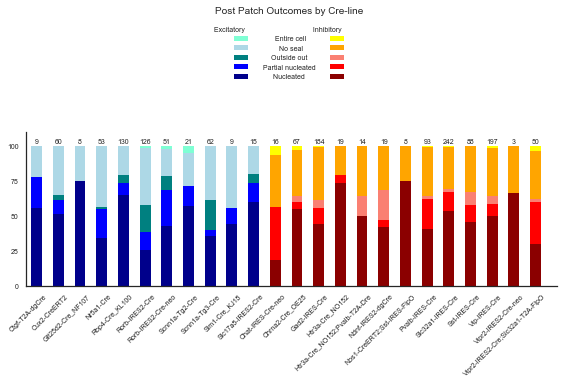

In [22]:
exc_group = len(exc_names)
exc_index = np.arange(exc_group)
inhib_group = len(inhib_names)
inhib_index = (np.arange(inhib_group)+exc_group)
bar_width = 0.5

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['left'].set_bounds(0,110)

exc_nuc = plt.bar(exc_index, exc_nucs, color='darkblue', width=bar_width)
exc_part_nuc = plt.bar(exc_index, exc_part_nucs, color='blue', bottom=exc_nucs, width=bar_width)
exc_out_out = plt.bar(exc_index, exc_out_outs, color='teal', bottom=[i+j for i,j in zip(exc_nucs,exc_part_nucs)], width=bar_width)
exc_no_seal = plt.bar(exc_index, exc_no_seals, color='lightblue', bottom=[i+j+k for i,j,k in zip(exc_nucs,exc_part_nucs,exc_out_outs)], width=bar_width)
exc_entire = plt.bar(exc_index, exc_entires, color='aquamarine', bottom=[i+j+k+l for i,j,k,l in zip(exc_nucs,exc_part_nucs,exc_out_outs,exc_no_seals)], width=bar_width)
for nuc, total in zip(exc_nuc, excite_totals):
    ax.text(nuc.get_x()+nuc.get_width()/2, 101, total, ha='center', va='bottom', fontsize=7)

inhib_nuc = plt.bar(inhib_index, inhib_nucs, color='darkred', width=bar_width)
inhib_part_nuc = plt.bar(inhib_index, inhib_part_nucs, color='red', bottom=inhib_nucs, width=bar_width)
inhib_out_out = plt.bar(inhib_index, inhib_out_outs, color='salmon', bottom=[i+j for i,j in zip(inhib_nucs,inhib_part_nucs)], width=bar_width)
inhib_no_seal = plt.bar(inhib_index, inhib_no_seals, color='orange', bottom=[i+j+k for i,j,k in zip(inhib_nucs,inhib_part_nucs,inhib_out_outs)], width=bar_width)
inhib_entire = plt.bar(inhib_index, inhib_entires, color='yellow', bottom=[i+j+k+l for i,j,k,l in zip(inhib_nucs,inhib_part_nucs,inhib_out_outs,inhib_no_seals)], width=bar_width)
for nuc, total in zip(inhib_nuc, inhibit_totals):
    ax.text(nuc.get_x()+nuc.get_width()/2, 101, total, ha='center', va='bottom', fontsize=7)

axes = plt.gca()
plt.xticks(all_index+0.5, all_names, rotation=45, size=7, ha='right')
plt.yticks([0,25,50,75,100], size=7)
axes.set_xlim([-0.5,24])
axes.set_ylim([0,190])
leg = plt.legend((exc_entire, exc_no_seal, exc_out_out, exc_part_nuc, exc_nuc, 
            inhib_entire, inhib_no_seal, inhib_out_out, inhib_part_nuc, inhib_nuc),
            ('           Entire cell', '             No seal', '         Outside out',
            '     Partial nucleated', '          Nucleated', '', '', '', '', ''), ncol=2,
            prop = {'size':7}, loc='upper center')
leg.set_title('Excitatory                                  Inhibitory', prop={'size':7})
leg.get_title().set_position((-14,0))
plt.title('Post Patch Outcomes by Cre-line  ', fontsize='10')
plt.tight_layout()
fig.savefig('post_patch_outcome_by_creline', dpi=300)

#plt.imshow('post_patch_outcome_by_creline.png')
#plt.savefig('post_patch_outcome_by_creline', bbox_inches='tight', dpi=300)
#display 'post_patch_outcome_by_creline.png'

In [442]:
tps = ps2.pivot_table(values=['Post patch?'],
                      index=['type', 'Cre_line'],
                      columns='post patch class',
                      aggfunc='sum')
#column_order = ['Nucleated', 'Partial nucleated', 'Outside out', 'No seal', 'Entire cell']
#tps2 = tps.reindex_axis(column_order, axis=1)
type(tps)
tps

Post patch?                      \
post patch class                            a.Nucleated b.Partial nucleated   
type       Cre_line                                                           
excitatory Ctgf-T2A-dgCre                           5.0                 2.0   
           Cux2-CreERT2                            31.0                 6.0   
           Glt25d2-Cre_NF107                        6.0                 NaN   
           Nr5a1-Cre                               18.0                11.0   
           Rbp4-Cre_KL100                          84.0                12.0   
           Rorb-IRES2-Cre                          32.0                17.0   
           Rorb-IRES2-Cre-neo                      22.0                13.0   
           Scnn1a-Tg2-Cre                          12.0                 3.0   
           Scnn1a-Tg3-Cre                          22.0                 3.0   
           Sim1-Cre_KJ18                            4.0                 1.0   
           Slc17a8-IRES2-Cre                        9.0                 2.0   
inhibitory Chat-IRES-Cre-neo                        3.0                 6.0   
           Chrna2-Cre_OE25                         37.0                 3.0   
           Gad2-IRES-Cre                           82.0                21.0   
           Htr3a-Cre_NO152                         14.0                 1.0   
           Htr3a-Cre_NO152;Pvalb-T2A-Dre            7.0                 NaN   
           Ndnf-IRES2-dgCre                         8.0                 1.0   
           Nos1-CreERT2;Sst-IRES-FlpO               6.0                 NaN   
           Pvalb-IRES-Cre                          38.0                20.0   
           Slc32a1-IRES-Cre                       130.0                33.0   
           Sst-IRES-Cre                            40.0                11.0   
           Vip-IRES-Cre                            98.0                17.0   
           Vipr2-IRES2-Cre-neo                      2.0                 NaN   
           Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO        15.0                15.0   
mix        Oxtr-T2A-Cre                            39.0                 7.0   
unknown    Pdyn-T2A-CreERT2                         3.0                 5.0   

                                                                     \
post patch class                            c.Outside out d.No seal   
type       Cre_line                                                   
excitatory Ctgf-T2A-dgCre                             NaN       2.0   
           Cux2-CreERT2                               2.0      21.0   
           Glt25d2-Cre_NF107                          NaN       2.0   
           Nr5a1-Cre                                  1.0      23.0   
           Rbp4-Cre_KL100                             7.0      27.0   
           Rorb-IRES2-Cre                            24.0      51.0   
           Rorb-IRES2-Cre-neo                         5.0      10.0   
           Scnn1a-Tg2-Cre                             NaN       5.0   
           Scnn1a-Tg3-Cre                            13.0      24.0   
           Sim1-Cre_KJ18                              NaN       4.0   
           Slc17a8-IRES2-Cre                          1.0       3.0   
inhibitory Chat-IRES-Cre-neo                          NaN       6.0   
           Chrna2-Cre_OE25                            3.0      22.0   
           Gad2-IRES-Cre                             10.0      70.0   
           Htr3a-Cre_NO152                            NaN       4.0   
           Htr3a-Cre_NO152;Pvalb-T2A-Dre              2.0       5.0   
           Ndnf-IRES2-dgCre                           4.0       6.0   
           Nos1-CreERT2;Sst-IRES-FlpO                 NaN       2.0   
           Pvalb-IRES-Cre                             2.0      32.0   
           Slc32a1-IRES-Cre                           5.0      72.0   
           Sst-IRES-Cre                               8.0      29.0   
           Vip-IRES-Cre                         

In [443]:
#lst = list(tps['Post patch?'])
#lst
nucs = list(tps['Post patch?', 'a.Nucleated'])
part_nucs = list(tps['Post patch?', 'b.Partial nucleated'])
out_outs = list(tps['Post patch?', 'c.Outside out'])
no_seals = list(tps['Post patch?', 'd.No seal'])
entires = list(tps['Post patch?', 'e.Entire cell'])
#type(nucs)
#part_nucs

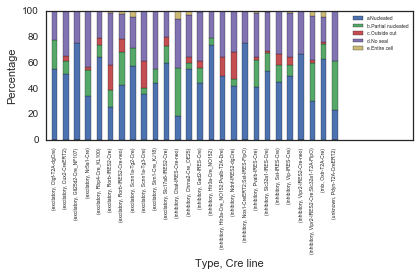

In [445]:
tps = ps2.pivot_table(values='Post patch?',
                      index=['type', 'Cre_line'],
                      columns='post patch class',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)*100
tps.plot(kind='bar', stacked=True)

axes = plt.gca()
axes.set_ylim(0, 100)
axes.set_xlim(-0.75,32)
plt.xticks(size=5)
plt.legend(loc='upper right', prop={'size': 5})
plt.xlabel('Type, Cre line')
plt.ylabel('Percentage')
plt.savefig("post_patch_by_creline", dpi=300)

In [ ]:
ps0 = ps.drop('Post patch?', 1)
ps0 = ps.drop('PCR cycles', 1)
ps0 = ps.drop('SM_QC_PF', 1)

In [55]:
ps0.to_csv('cre_nuc.csv')

In [56]:
ps['Cre_line'].value_counts()
#ps['Cre line'].sort_values()

Gad2-IRES-Cre                       255
Slc32a1-IRES-Cre                    253
Vip-IRES-Cre                        225
Rbp4-Cre_KL100                      130
Rorb-IRES2-Cre                      128
Pvalb-IRES-Cre                      118
Sst-IRES-Cre                        100
Oxtr-T2A-Cre                         71
Chrna2-Cre_OE25                      67
Scnn1a-Tg3-Cre                       62
Cux2-CreERT2                         60
Nr5a1-Cre                            60
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO     59
Rorb-IRES2-Cre-neo                   51
Scnn1a-Tg2-Cre                       32
Ctgf-T2A-dgCre                       30
Chat-IRES-Cre-neo                    27
Htr3a-Cre_NO152                      19
Ndnf-IRES2-dgCre                     19
Htr3a-Cre_NO152;Pvalb-T2A-Dre        16
Slc17a8-IRES2-Cre                    15
Pdyn-T2A-CreERT2                     13
Glt25d2-Cre_NF107                    12
Nos1-CreERT2;Sst-IRES-FlpO           10
Nkx2-1-CreERT2                        9


In [83]:
ps.groupby(['Cre_line'])['post patch class'].value_counts()
ps

,post patch class,Cre_line,post_patch
4971,Nucleated,Sst-IRES-Cre,pass
4973,Nucleated,Sst-IRES-Cre,pass
4975,Nucleated,Sst-IRES-Cre,pass
4988,Nucleated,Vip-IRES-Cre,pass
4997,Nucleated,Vip-IRES-Cre,pass
5009,Nucleated,Vip-IRES-Cre,pass
5022,Nucleated,Gad2-IRES-Cre,pass
5026,Nucleated,Gad2-IRES-Cre,pass
5027,Nucleated,Gad2-IRES-Cre,pass
5035,Nucleated,Gad2-IRES-Cre,pass


In [58]:
ps = ps.drop('Date', 1)
ps = ps.drop('PCR cycles', 1)
ps = ps.drop('Post patch pipette R',1)
ps = ps.drop('Post patch?',1)
ps['post_patch'] = ps['SM_QC_PF']
ps = ps.drop('SM_QC_PF', 1)
#ps['total'] = ps['post_patch']
#ps.tail()

In [59]:
ps1 = ps.groupby(['Cre_line', 'post patch class']).count()
ps1

post_patch
Cre_line                         post patch class             
Chat-IRES-Cre-neo                Entire cell                 3
                                 No seal                    10
                                 Nucleated                   5
                                 Partial nucleated           9
Chrna2-Cre_OE25                  Entire cell                 2
                                 No seal                    22
                                 Nucleated                  37
                                 Outside out                 3
                                 Partial nucleated           3
Ctgf-T2A-dgCre                   No seal                    15
                                 Nucleated                  13
                                 Partial nucleated           2
Cux2-CreERT2                     No seal                    21
                                 Nucleated                  31
                                 Outside out                 2
                                 Partial nucleated           6
Gad2-IRES-Cre                    Entire cell                 1
                                 No seal                    98
                                 Nucleated                 113
                                 Outside out                13
                                 Partial nucleated          30
Glt25d2-Cre_NF107                No seal                     3
                                 Nucleated                   8
                                 Partial nucleated           1
Htr3a-Cre_NO152                  No seal                     4
                                 Nucleated                  14
                                 Partial nucleated           1
Htr3a-Cre_NO152;Pvalb-T2A-Dre    No seal                     5
                                 Nucleated                   9
                                 Outside out                 2
...                                                        ...
Sim1-Cre_KJ18                    Nucleated                   4
                                 Partial nucleated           1
Slc17a8-IRES2-Cre                No seal                     3
                                 Nucleated                   9
                                 Outside out                 1
                                 Partial nucleated           2
Slc32a1-IRES-Cre                 Entire cell                 2
                                 No seal                    78
                                 Nucleated                 135
                                 Outside out                 5
                                 Partial nucleated          33
Sst-IRES-Cre                     No seal                    35
                                 Nucleated                  43
                                 Outside out                11
                                 Partial nucleated          11
Vip-IRES-Cre                     Entire cell                 4
                                 No seal                    83
                                 Nucleated                 104
                                 Outside out                14
                                 Partial nucleated          20
Vipr2-IRES2-Cre-neo              No seal                     1
                                 Nucleated                   2
Vipr2-IRES2-Cre;Pvalb-T2A-FlpO   No seal                     4
                                 Outside out                 1
                                 Partial nucleated           1
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO Entire cell                 2
                                 No seal                    23
                                 Nucleated                  16
                                 Outside out                 1
                                 Partial nucleated          17

[108 rows x 1 columns]

In [60]:
type(ps1)

pandas.core.frame.DataFrame

In [61]:
ps1 = ps1.add_suffix('_count').reset_index()
ps1

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,3
1,Chat-IRES-Cre-neo,No seal,10
2,Chat-IRES-Cre-neo,Nucleated,5
3,Chat-IRES-Cre-neo,Partial nucleated,9
4,Chrna2-Cre_OE25,Entire cell,2
5,Chrna2-Cre_OE25,No seal,22
6,Chrna2-Cre_OE25,Nucleated,37
7,Chrna2-Cre_OE25,Outside out,3
8,Chrna2-Cre_OE25,Partial nucleated,3
9,Ctgf-T2A-dgCre,No seal,15


In [62]:
ps1['post_patch_count'] = ps1['post_patch_count'].fillna(0)
#ps1['total_count'] = ps1['total_count'].fillna(0)
ps1
#ps1.groupby(['Cre line', 'Post patch?']).agg({'total_count': 'sum'})

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,3
1,Chat-IRES-Cre-neo,No seal,10
2,Chat-IRES-Cre-neo,Nucleated,5
3,Chat-IRES-Cre-neo,Partial nucleated,9
4,Chrna2-Cre_OE25,Entire cell,2
5,Chrna2-Cre_OE25,No seal,22
6,Chrna2-Cre_OE25,Nucleated,37
7,Chrna2-Cre_OE25,Outside out,3
8,Chrna2-Cre_OE25,Partial nucleated,3
9,Ctgf-T2A-dgCre,No seal,15


In [63]:
type(ps1)

pandas.core.frame.DataFrame

In [64]:
ps_totals = ps1.groupby(['Cre_line', 'post patch class']).agg({'post_patch_count': 'sum'})
ps2 = ps1.groupby(['Cre_line']).agg({'post_patch_count': 'sum'})
ps_final = ps_totals.div(ps2, level = 'Cre_line') * 100

In [65]:
ps_final = ps_final.reset_index()

In [66]:
ps_final

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,11.111111
1,Chat-IRES-Cre-neo,No seal,37.037037
2,Chat-IRES-Cre-neo,Nucleated,18.518519
3,Chat-IRES-Cre-neo,Partial nucleated,33.333333
4,Chrna2-Cre_OE25,Entire cell,2.985075
5,Chrna2-Cre_OE25,No seal,32.835821
6,Chrna2-Cre_OE25,Nucleated,55.223881
7,Chrna2-Cre_OE25,Outside out,4.477612
8,Chrna2-Cre_OE25,Partial nucleated,4.477612
9,Ctgf-T2A-dgCre,No seal,50.000000


In [67]:
ps_nuc = ps_final[ps_final['post patch class'] == 'Nucleated']
ps_nuc['pct_nuc'] = ps_nuc['post_patch_count']
ps_nuc = ps_nuc.drop('post_patch_count', 1)
ps_nuc = ps_nuc.drop('post patch class', 1)
ps_nuc = ps_nuc.reset_index()
#ps_nuc.set_index('Cre_line', inplace=True)
ps_nuc = ps_nuc.drop('index', 1)
ps_nuc

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Cre_line,pct_nuc
0,Chat-IRES-Cre-neo,18.518519
1,Chrna2-Cre_OE25,55.223881
2,Ctgf-T2A-dgCre,43.333333
3,Cux2-CreERT2,51.666667
4,Gad2-IRES-Cre,44.313725
5,Glt25d2-Cre_NF107,66.666667
6,Htr3a-Cre_NO152,73.684211
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,56.250000
8,Ndnf-IRES2-dgCre,42.105263
9,Nkx2-1-CreERT2,44.444444


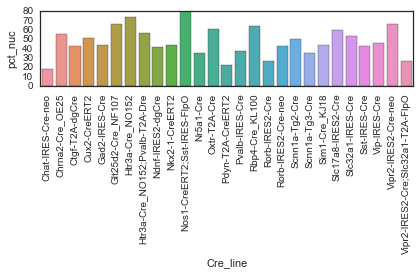

In [68]:
cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', data = ps_nuc)
for item in cre_nuc.get_xticklabels():
    item.set_rotation(90)
#plt.setp(cre_nuc.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.savefig('cre_line_vs_pct_nuc',dpi=100)

In [69]:
#ps2 = ps2.reset_index()
ps2
#ps2.to_csv('cre_line_totals.csv')

,post_patch_count
Cre_line,
Chat-IRES-Cre-neo,27
Chrna2-Cre_OE25,67
Ctgf-T2A-dgCre,30
Cux2-CreERT2,60
Gad2-IRES-Cre,255
Glt25d2-Cre_NF107,12
Htr3a-Cre_NO152,19
Htr3a-Cre_NO152;Pvalb-T2A-Dre,16
Ndnf-IRES2-dgCre,19


In [70]:
#ps2 = ps2.set_index('Cre_line', inplace=True)
ps2 = ps2.reset_index()
#ps2.to_csv('cre_line_totals.csv')

In [71]:
ps2

,Cre_line,post_patch_count
0,Chat-IRES-Cre-neo,27
1,Chrna2-Cre_OE25,67
2,Ctgf-T2A-dgCre,30
3,Cux2-CreERT2,60
4,Gad2-IRES-Cre,255
5,Glt25d2-Cre_NF107,12
6,Htr3a-Cre_NO152,19
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,16
8,Ndnf-IRES2-dgCre,19
9,Nkx2-1-CreERT2,9


In [72]:
ps2 = ps2.drop('Cre_line', 1)

In [73]:
ps2

,post_patch_count
0,27
1,67
2,30
3,60
4,255
5,12
6,19
7,16
8,19
9,9


In [74]:
result = pd.concat([ps_nuc, ps2], axis=1, join='inner')
result

,Cre_line,pct_nuc,post_patch_count
0,Chat-IRES-Cre-neo,18.518519,27
1,Chrna2-Cre_OE25,55.223881,67
2,Ctgf-T2A-dgCre,43.333333,30
3,Cux2-CreERT2,51.666667,60
4,Gad2-IRES-Cre,44.313725,255
5,Glt25d2-Cre_NF107,66.666667,12
6,Htr3a-Cre_NO152,73.684211,19
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,56.250000,16
8,Ndnf-IRES2-dgCre,42.105263,19
9,Nkx2-1-CreERT2,44.444444,9


In [75]:
types = {'Chat-IRES-Cre-neo': 'inhibitory', 
       'Chrna2-Cre_OE25': 'inhibitory', 
       'Ctgf-T2A-dgCre': 'excitatory', 
       'Cux2-CreERT2': 'excitatory',
       'Gad2-IRES-Cre': 'inhibitory',
       'Glt25d2-Cre_NF107': 'excitatory',
       'Htr3a-Cre_NO152': 'inhibitory',
       'Htr3a-Cre_NO152;Pvalb-T2A-Dre': 'inhibitory',
       'Ndnf-IRES2-dgCre': 'inhibitory',
       'Nkx2-1-CreERT2': 'inhibitory',
       'Nos1-CreERT2;Sst-IRES-FlpO': 'inhibitory',
       'Nr5a1-Cre': 'excitatory',
       'Oxtr-T2A-Cre': 'mix',
       'Pdyn-T2A-CreERT2': 'unknown',
       'Pvalb-IRES-Cre': 'inhibitory',
       'Rbp4-Cre_KL100': 'excitatory',
       'Rorb-IRES2-Cre': 'excitatory',
       'Rorb-IRES2-Cre-neo': 'excitatory',
       'Scnn1a-Tg2-Cre': 'excitatory',
       'Scnn1a-Tg3-Cre': 'excitatory',
       'Sim1-Cre_KJ18': 'excitatory',
       'Slc17a8-IRES2-Cre': 'excitatory',
       'Slc32a1-IRES-Cre': 'inhibitory',
       'Sst-IRES-Cre': 'inhibitory',
       'Vip-IRES-Cre': 'inhibitory',
       'Vipr2-IRES2-Cre-neo': 'inhibitory',
       'Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO': 'inhibitory'}

result['type'] = result['Cre_line'].map(types)

In [76]:
result.set_index('Cre_line')
result.sort_values('type')

,Cre_line,pct_nuc,post_patch_count,type
2,Ctgf-T2A-dgCre,43.333333,30,excitatory
3,Cux2-CreERT2,51.666667,60,excitatory
5,Glt25d2-Cre_NF107,66.666667,12,excitatory
21,Slc17a8-IRES2-Cre,60.000000,15,excitatory
20,Sim1-Cre_KJ18,44.444444,9,excitatory
19,Scnn1a-Tg3-Cre,35.483871,62,excitatory
18,Scnn1a-Tg2-Cre,50.000000,32,excitatory
11,Nr5a1-Cre,35.000000,60,excitatory
17,Rorb-IRES2-Cre-neo,43.137255,51,excitatory
16,Rorb-IRES2-Cre,26.562500,128,excitatory


In [81]:
result1 = result.pivot_table(index = 'type', columns = 'Cre_line', values = 'pct_nuc')
#result.reset_index()
#lst = list(result['Chat-IRES-Cre-neo'])
result1
#type(result1)

Cre_line,Chat-IRES-Cre-neo,Chrna2-Cre_OE25,Ctgf-T2A-dgCre,Cux2-CreERT2,Gad2-IRES-Cre,Glt25d2-Cre_NF107,Htr3a-Cre_NO152,Htr3a-Cre_NO152;Pvalb-T2A-Dre,Ndnf-IRES2-dgCre,Nkx2-1-CreERT2,...,Rorb-IRES2-Cre-neo,Scnn1a-Tg2-Cre,Scnn1a-Tg3-Cre,Sim1-Cre_KJ18,Slc17a8-IRES2-Cre,Slc32a1-IRES-Cre,Sst-IRES-Cre,Vip-IRES-Cre,Vipr2-IRES2-Cre-neo,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO
type,,,,,,,,,,,,,,,,,,,,,
excitatory,NaN,NaN,43.333333,51.666667,NaN,66.666667,NaN,NaN,NaN,NaN,...,43.137255,50.0,35.483871,44.444444,60.0,NaN,NaN,NaN,NaN,NaN
inhibitory,18.518519,55.223881,NaN,NaN,44.313725,NaN,73.684211,56.25,42.105263,44.444444,...,NaN,NaN,NaN,NaN,NaN,53.359684,43.0,46.222222,66.666667,27.118644
mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


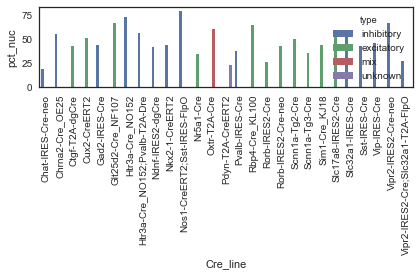

In [34]:
cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', hue = 'type', data = result)
for item in cre_nuc.get_xticklabels():
    item.set_rotation(90)

(0, 100)

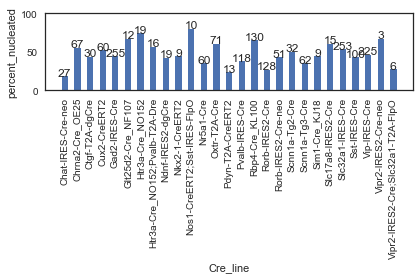

In [35]:
#cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', data = result)
#for item in cre_nuc.get_xticklabels():
    #item.set_rotation(90)
nuc_pct = list(result['pct_nuc'])
counts = list(result['post_patch_count'])
names = list(result['Cre_line'])
n_groups = len(names)
#n_groups = 27
index = np.arange(n_groups)
bar_width = 0.5
plt.xlabel('Cre_line')
plt.ylabel('percent_nucleated')
plt.xticks(index, names, rotation=90)
rects = plt.bar(index, nuc_pct, bar_width)
for i, rect in enumerate(rects):
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1.01*height, counts[i], ha='center')
plt.tight_layout
axes = plt.gca()
axes.set_ylim(0,100)